In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Завдання 1


In [2]:
# Імпортуємо потрібний DataFrame
df = pd.read_csv('data_bin.csv')
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
939     MS   M   20       U     LE3       A     2     2  services  services   
940     MS   M   17       U     LE3       T     3     1  services  services   
941     MS   M   21       R     GT3       T     1     1     other     other   
942     MS   M   18       R     LE3       T     3     2  services     other   
943     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... romantic famrel  freetime  goout  Dalc Walc health absences  \
0    ...       no      4         3      4     1    1      3        4   
1    ...       no      5         3      3     1    1      3        2   
2    ...       no      4         3      2     2    3      3        6   
3    ...      yes      3         2      2     1    1      5        0   
4    ...       no      4         3      2     1    2      5        0   
..   ...      ...    ...       ...    ...   ...  ...    ...      ...   
939  ...       no      5         5      4     4    5      4       11   
940  ...       no      2         4      5     3    4      2        3   
941  ...       no      5         5      3     3    3      3        3   
942  ...       no      4         4      1     3    4      5        0   
943  ...       no      3         2      3     3    3      5        5   

          sem PASSED  
0   -2.302585   True  
1    2.208274   True  
2    2.493205   True  
3    2.646175   True  
4    2.406945   True  
..        ...    ...  
939  2.208274  False  
940  2.646175   True  
941  2.091864  False  
942  2.406945  False  
943  2.091864  False  

[944 rows x 32 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      944 non-null    object 
 1   sex         944 non-null    object 
 2   age         944 non-null    int64  
 3   address     944 non-null    object 
 4   famsize     944 non-null    object 
 5   Pstatus     944 non-null    object 
 6   Medu        944 non-null    int64  
 7   Fedu        944 non-null    int64  
 8   Mjob        944 non-null    object 
 9   Fjob        944 non-null    object 
 10  reason      944 non-null    object 
 11  guardian    944 non-null    object 
 12  traveltime  944 non-null    int64  
 13  studytime   944 non-null    int64  
 14  failures    944 non-null    int64  
 15  schoolsup   944 non-null    object 
 16  famsup      944 non-null    object 
 17  paid        944 non-null    object 
 18  activities  944 non-null    object 
 19  nursery     944 non-null    o

In [4]:
# Перевіряєм чи є незаповнені данні у DataFrame
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
sem           0
PASSED        0
dtype: int64

In [5]:
# Розділяєм ознаки на числові і не числові
text_features = [i for i in df.columns if type(df[i][0]) == str]
nums_features = [i for i in df.columns if i not in text_features]

<Axes: >

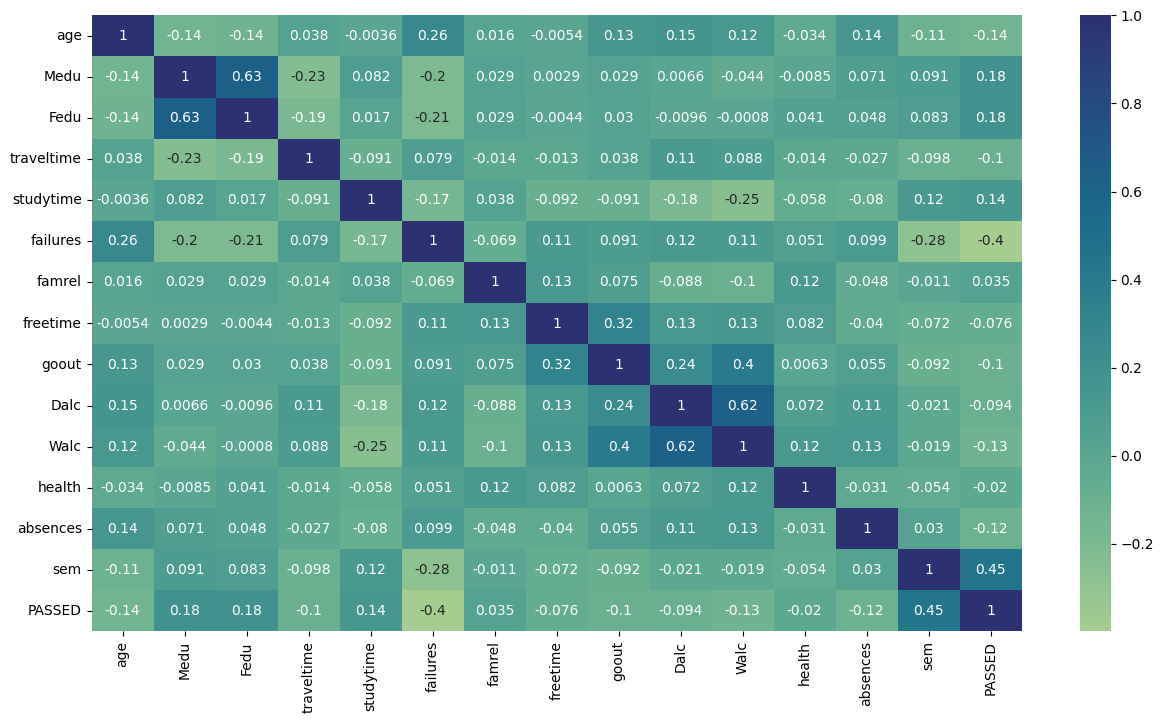

In [6]:
# Розглянемо кореляцію  цільвої змінної і числових ознак
plt.figure(figsize=(15,8))
sns.heatmap(df.corr( numeric_only=True ),annot=True,cmap="crest")

<Axes: xlabel='PASSED', ylabel='Count'>

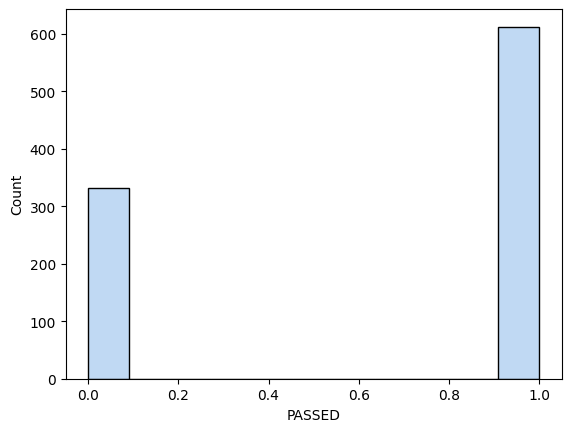

In [7]:
# Розпреділення цільвої змінної
sns.histplot(df,x='PASSED',color='#abcdef')

<Figure size 1500x10000 with 0 Axes>

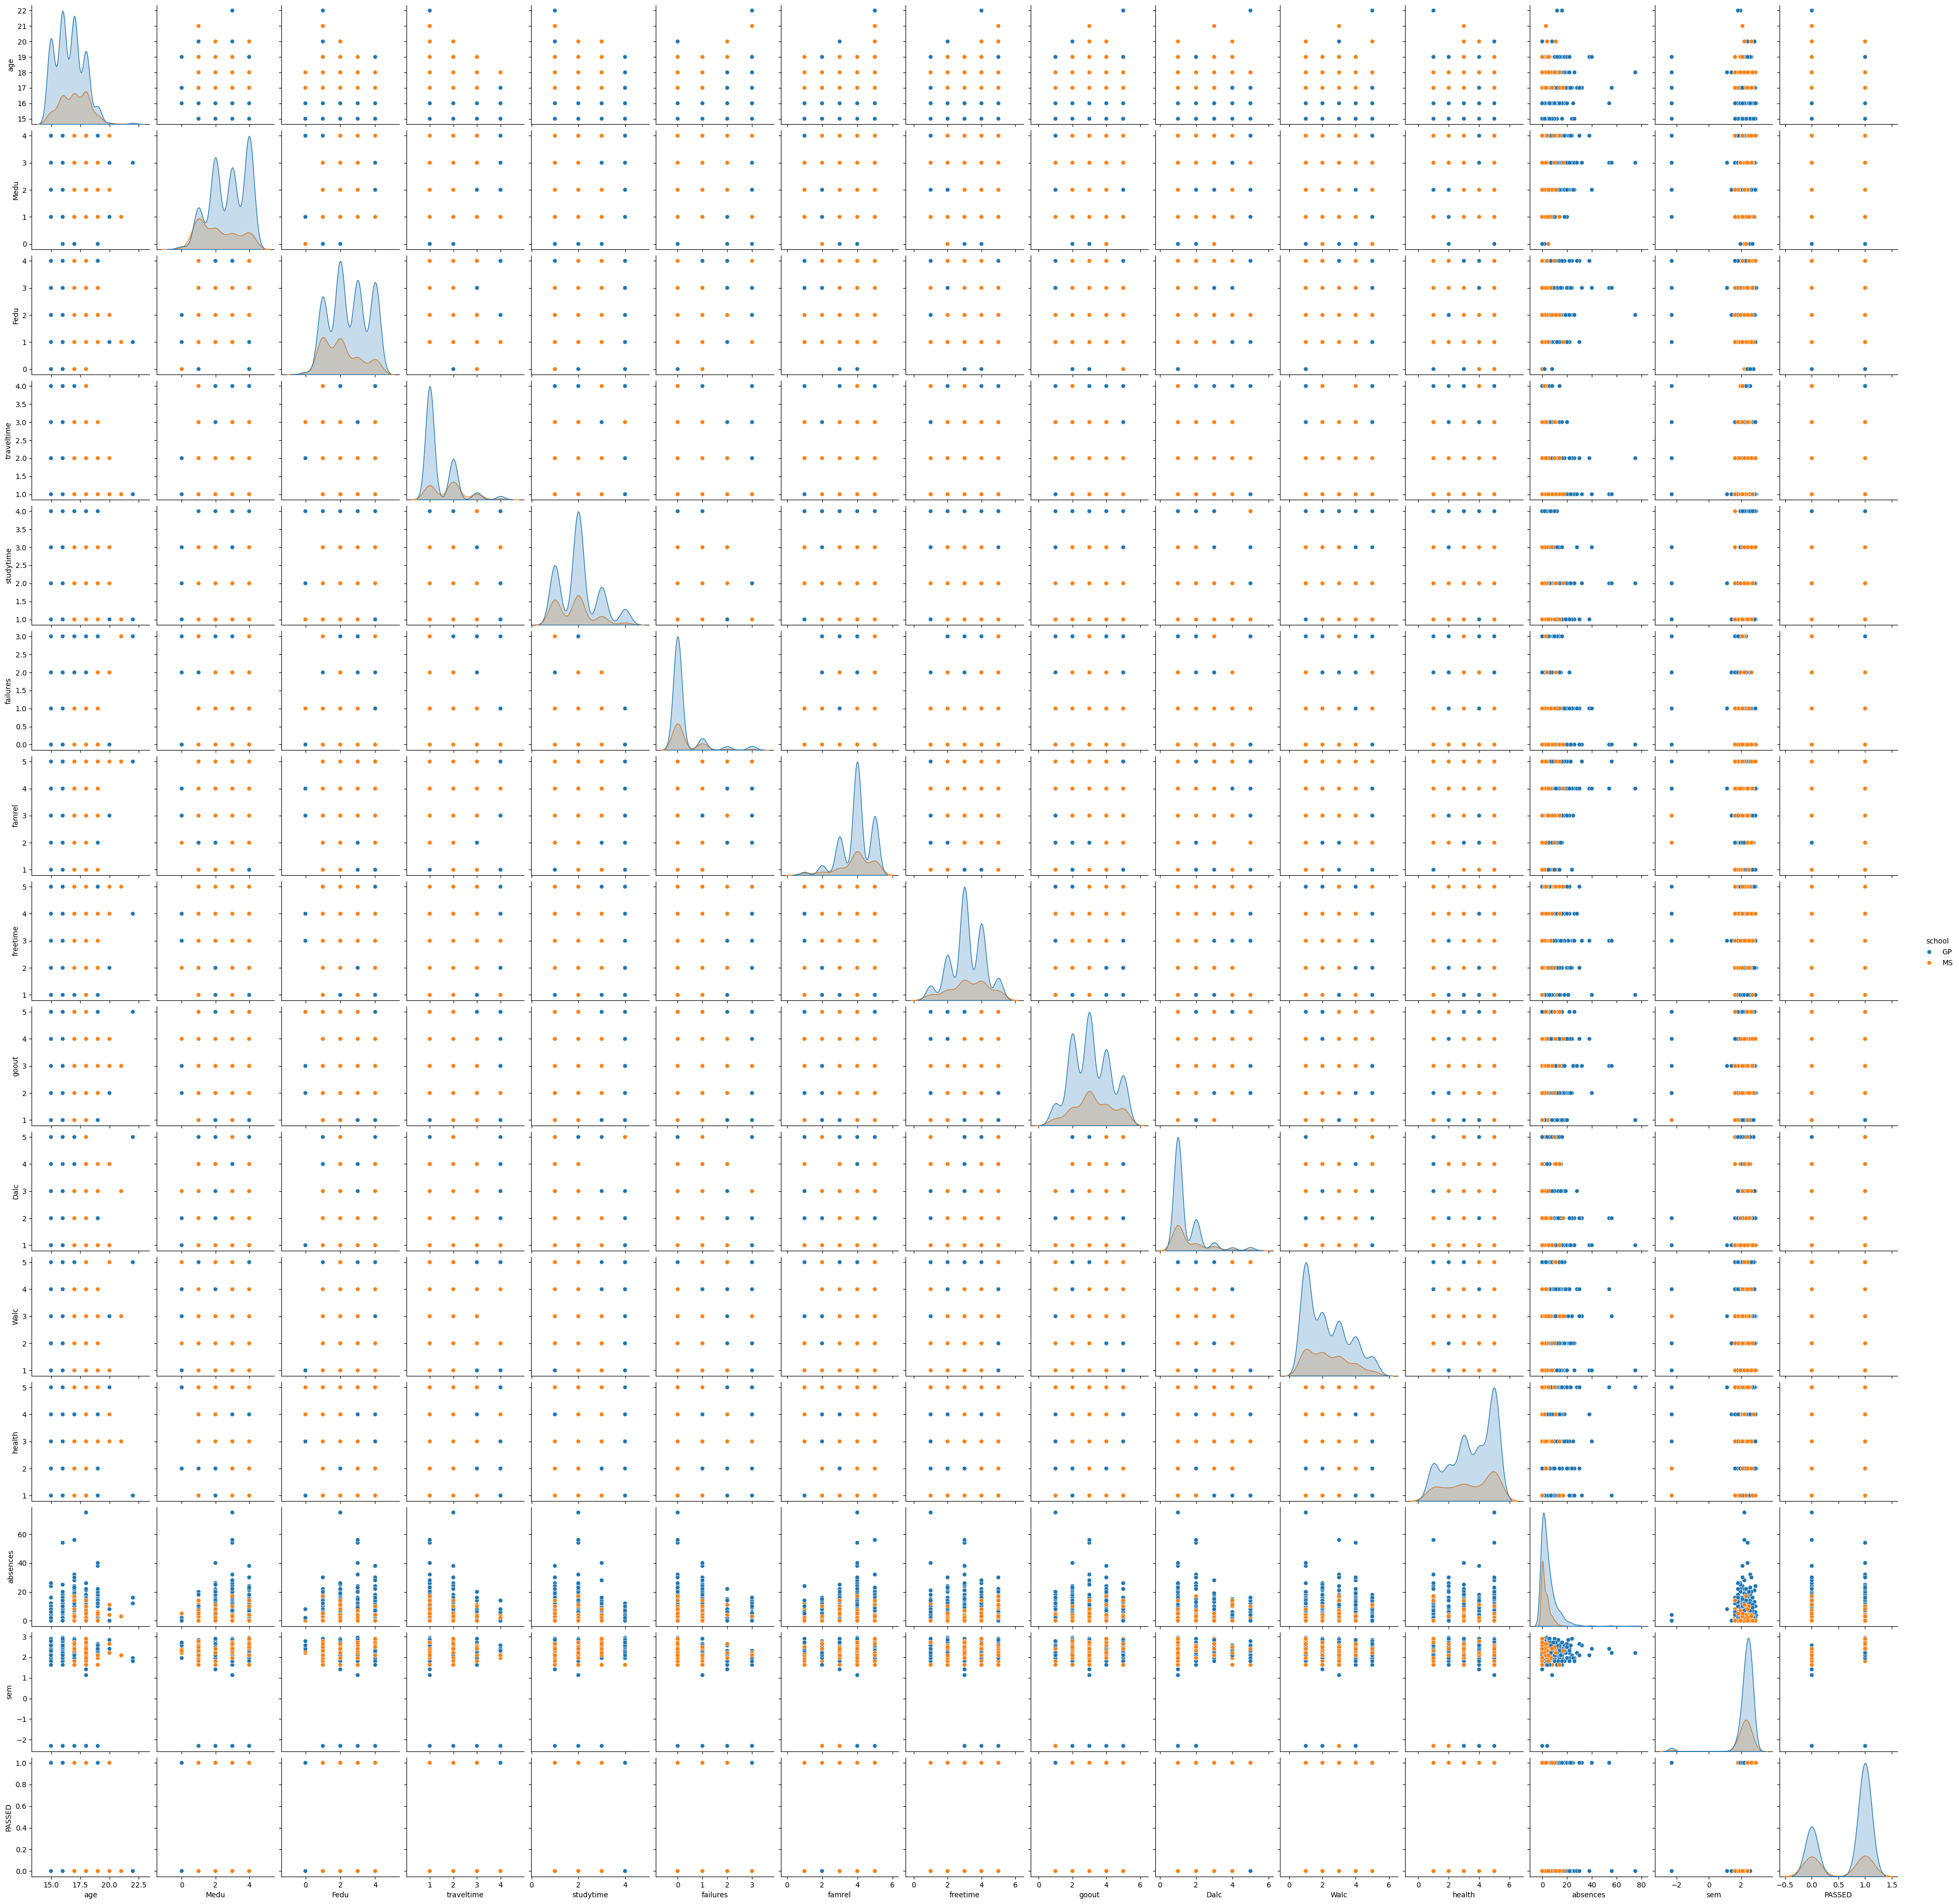

In [8]:
# Розглянем як різні ознаки поводяться відносно одна одної
plt.figure(figsize=(15,100))
sns.pairplot(df , x_vars = nums_features , y_vars = nums_features , hue='school')

In [9]:
# Приводим всі колонки дата фрейму до числового вигляду за допомогою OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder


columns_ohe = make_column_transformer(
    ( OneHotEncoder(handle_unknown='ignore',sparse_output=False) , text_features),
    remainder = 'passthrough'
).set_output(transform='pandas')

In [10]:
# Отримуємо DataFrame який повністю складений з числових ознак
df_ohe = columns_ohe.fit_transform(df)
df_ohe
df_ohe.remainder__PASSED = df_ohe.remainder__PASSED.replace({True: 1, False: 0})
df_ohe

onehotencoder__school_GP  onehotencoder__school_MS  onehotencoder__sex_F  \
0                         1.0                       0.0                   1.0   
1                         1.0                       0.0                   1.0   
2                         1.0                       0.0                   1.0   
3                         1.0                       0.0                   1.0   
4                         1.0                       0.0                   1.0   
..                        ...                       ...                   ...   
939                       0.0                       1.0                   0.0   
940                       0.0                       1.0                   0.0   
941                       0.0                       1.0                   0.0   
942                       0.0                       1.0                   0.0   
943                       0.0                       1.0                   0.0   

     onehotencoder__sex_M  onehotencoder__address_R  onehotencoder__address_U  \
0                     0.0                       0.0                       1.0   
1                     0.0                       0.0                       1.0   
2                     0.0                       0.0                       1.0   
3                     0.0                       0.0                       1.0   
4                     0.0                       0.0                       1.0   
..                    ...                       ...                       ...   
939                   1.0                       0.0                       1.0   
940                   1.0                       0.0                       1.0   
941                   1.0                       1.0                       0.0   
942                   1.0                       1.0                       0.0   
943                   1.0                       0.0                       1.0   

     onehotencoder__famsize_GT3  onehotencoder__famsize_LE3  \
0                           1.0                         0.0   
1                           1.0                         0.0   
2                           0.0                         1.0   
3                           1.0                         0.0   
4                           1.0                         0.0   
..                          ...                         ...   
939                         0.0                         1.0   
940                         0.0                         1.0   
941                         1.0                         0.0   
942                         0.0                         1.0   
943                         0.0                         1.0   

     onehotencoder__Pstatus_A  onehotencoder__Pstatus_T  ...  \
0                         1.0                       0.0  ...   
1                         0.0                       1.0  ...   
2                         0.0                       1.0  ...   
3                         0.0                       1.0  ...   
4                         0.0                       1.0  ...   
..                        ...                       ...  ...   
939                       1.0                       0.0  ...   
940                       0.0                       1.0  ...   
941                       0.0                       1.0  ...   
942                       0.0                       1.0  ...   
943                       0.0                       1.0  ...   

     remainder__failures  remainder__famrel  remainder__freetime  \
0                      0                  4                    3   
1                      0                  5                    3   
2                      0                  4                    3   
3                      0                  3                    2   
4                      0                  4                    3   
..                   ...                ...                  ...   
939                    2                  5              

# Завдання 2

In [11]:
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split


# Вибірка для Завдання 2
X_num = df[nums_features[:-1]]
y = (df_ohe['remainder__PASSED'])
X_num.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  944.000000  944.000000  944.000000  944.000000  944.000000  944.000000   
mean    16.688559    2.636653    2.404661    1.507415    1.985169    0.253178   
std      1.204638    1.129181    1.098258    0.723744    0.832653    0.645147   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  944.000000  944.000000  944.000000  944.000000  944.000000  944.000000   
mean     3.940678    3.192797    3.145127    1.475636    2.282839    3.527542   
std      0.907538    1.028188    1.137949    0.877091    1.268545    1.434791   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences         sem  
count  944.000000  944.000000  
mean     4.385593    2.284653  
std      6.331564    0.679939  
min      0.000000   -2.302585  
25%      0.000000    2.208274  
50%      2.000000    2.406945  
75%      6.000000    2.572612  
max     75.000000    2.949688

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_num_for_train , X_num_for_validation , y_num_for_train , y_num_for_validation = train_test_split(X_num,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_num_for_train = QuantileTransformer().fit_transform(X_num_for_train)
X_num_for_validation = QuantileTransformer().fit_transform(X_num_for_validation)


pd.DataFrame(X_num_for_train,columns=X_num.columns).describe()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (660). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (284). n_quantiles is set to n_samples.
  warnings.warn(


age        Medu        Fedu  traveltime   studytime    failures  \
count  660.000000  660.000000  660.000000  660.000000  660.000000  660.000000   
mean     0.483109    0.547075    0.527181    0.326804    0.461900    0.153235   
std      0.306085    0.340366    0.319127    0.395988    0.325769    0.343381   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.328528    0.319423    0.385432    0.000000    0.000000    0.000000   
50%      0.606222    0.575114    0.385432    0.000000    0.530349    0.000000   
75%      0.843703    1.000000    0.654021    0.747344    0.530349    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  660.000000  660.000000  660.000000  660.000000  660.000000  660.000000   
mean     0.532876    0.502552    0.510238    0.263850    0.433871    0.558225   
std      0.315985    0.288652    0.302857    0.394338    0.363092    0.372135   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.492413    0.420334    0.180577    0.000000    0.000000    0.198027   
50%      0.492413    0.420334    0.462822    0.000000    0.481791    0.557663   
75%      1.000000    0.758725    0.735964    0.792868    0.691958    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         absences         sem  
count  660.000000  660.000000  
mean     0.442678    0.499600  
std      0.352292    0.288211  
min      0.000000    0.000000  
25%      0.000000    0.261760  
50%      0.441578    0.516692  
75%      0.750379    0.752656  
max      1.000000    1.000000

In [13]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


cv = 10
# LogisticRegression with L1 penalty
LogisticRegression_l1 = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['l1'] , 'C' : np.logspace(-4,4,20), 'solver' : ['liblinear','saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_num_for_train,y_num_for_train)


LogisticRegression_l1_X_num = pd.DataFrame(LogisticRegression_l1.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
LogisticRegression_l1_X_num


param_C param_max_iter param_penalty param_solver  \
0     0.0001            100            l1    liblinear   
1     0.0001            100            l1         saga   
2     0.0001           1000            l1    liblinear   
3     0.0001           1000            l1         saga   
4     0.0001           2500            l1    liblinear   
..       ...            ...           ...          ...   
155  10000.0           1000            l1         saga   
156  10000.0           2500            l1    liblinear   
157  10000.0           2500            l1         saga   
158  10000.0           3000            l1    liblinear   
159  10000.0           3000            l1         saga   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...           0.333333   
1    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...           0.666667   
2    {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l1...           0.333333   
3    {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l1...           0.666667   
4    {'C': 0.0001, 'max_iter': 2500, 'penalty': 'l1...           0.333333   
..                                                 ...                ...   
155  {'C': 10000.0, 'max_iter': 1000, 'penalty': 'l...           0.893939   
156  {'C': 10000.0, 'max_iter': 2500, 'penalty': 'l...           0.893939   
157  {'C': 10000.0, 'max_iter': 2500, 'penalty': 'l...           0.893939   
158  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.893939   
159  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.893939   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.333333           0.333333           0.333333   
1             0.666667           0.666667           0.666667   
2             0.333333           0.333333           0.333333   
3             0.666667           0.666667           0.666667   
4             0.333333           0.333333           0.333333   
..                 ...                ...                ...   
155           0.878788           0.939394           0.878788   
156           0.878788           0.939394           0.878788   
157           0.878788           0.939394           0.878788   
158           0.878788           0.939394           0.878788   
159           0.878788           0.939394           0.878788   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.333333           0.333333           0.333333   
1             0.666667           0.666667           0.666667   
2             0.333333           0.333333           0.333333   
3             0.666667           0.666667           0.666667   
4             0.333333           0.333333           0.333333   
..                 ...                ...                ...   
155           0.863636           0.893939           0.924242   
156           0.863636           0.893939           0.924242   
157           0.863636           0.893939           0.924242   
158           0.863636           0.893939           0.924242   
159           0.863636           0.893939           0.924242   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.333333           0.333333           0.333333         0.333333   
1             0.666667           0.666667           0.666667         0.666667   
2             0.333333           0.333333           0.333333         0.333333   
3             0.666667           0.666667           0.666667         0.666667   
4             0.333333           0.333333           0.333333         0.333333   
..                 ...                ...                ...              ...   
155           0.878788           0.893939           0.863636         0.890909   
156           0.878788           0.893939           0.863636         0.890909   
157           0.878788           0.893939           0.863636         0.890909   
158           0.878788           0.

In [14]:


LogisticRegression_l1_best_model = LogisticRegression_l1.best_estimator_
print(f'Найкраща модель з L1 регуляризацією : {LogisticRegression_l1_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {LogisticRegression_l1.best_params_}')
print(f'Accuracy для найкращої моделі з l1 регуляризацією на відкладеній вибірці: {accuracy_score(y_num_for_validation,LogisticRegression_l1_best_model.predict(X_num_for_validation))}')



Найкраща модель з L1 регуляризацією : LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')
Оптимальні параметри коефіцієнта та типу регуляризації {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy для найкращої моделі з l1 регуляризацією на відкладеній вибірці: 0.8802816901408451


In [15]:
# LogisticRegression with L2 penalty
LogisticRegression_l2 = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['l2'] , 'C' : np.logspace(-4,4,20), 'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_num_for_train,y_num_for_train)


LogisticRegression_l2_X_num = pd.DataFrame(LogisticRegression_l2.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
LogisticRegression_l2_X_num

param_C param_max_iter param_penalty     param_solver  \
0     0.0001            100            l2            lbfgs   
1     0.0001            100            l2        liblinear   
2     0.0001            100            l2        newton-cg   
3     0.0001            100            l2  newton-cholesky   
4     0.0001            100            l2              sag   
..       ...            ...           ...              ...   
475  10000.0           3000            l2        liblinear   
476  10000.0           3000            l2        newton-cg   
477  10000.0           3000            l2  newton-cholesky   
478  10000.0           3000            l2              sag   
479  10000.0           3000            l2             saga   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
1    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
2    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
3    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
4    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
..                                                 ...                ...   
475  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.893939   
476  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.893939   
477  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.893939   
478  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.893939   
479  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.893939   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.666667           0.666667           0.666667   
1             0.666667           0.666667           0.666667   
2             0.666667           0.666667           0.666667   
3             0.666667           0.666667           0.666667   
4             0.666667           0.666667           0.666667   
..                 ...                ...                ...   
475           0.878788           0.939394           0.878788   
476           0.878788           0.939394           0.893939   
477           0.878788           0.939394           0.878788   
478           0.878788           0.939394           0.878788   
479           0.878788           0.939394           0.878788   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.666667           0.666667           0.666667   
1             0.666667           0.666667           0.666667   
2             0.666667           0.666667           0.666667   
3             0.666667           0.666667           0.666667   
4             0.666667           0.666667           0.666667   
..                 ...                ...                ...   
475           0.863636           0.893939           0.924242   
476           0.863636           0.893939           0.924242   
477           0.863636           0.893939           0.924242   
478           0.863636           0.893939           0.924242   
479           0.863636           0.893939           0.924242   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.666667           0.666667           0.666667         0.666667   
1             0.666667           0.666667           0.666667         0.666667   
2             0.666667           0.666667           0.666667         0.666667   
3             0.666667           0.666667           0.666667         0.666667   
4             0.666667           0.666667           0.666667         0.666667   
..                 ...                ...                ...              ...   
475           0.878788           0.893939           0.863636         0.890909   
476           0.878788           0.893939           0.863636         0.892424   
477           0.878788           0.893939           0.863636        

In [16]:
LogisticRegression_l2_best_model = LogisticRegression_l2.best_estimator_
print(f'Найкраща модель з L2 регуляризацією : {LogisticRegression_l2_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {LogisticRegression_l2.best_params_}')
print(f'Accuracy для найкращої моделі з l2 регуляризацією на відкладеній вибірці: {accuracy_score(y_num_for_validation,LogisticRegression_l2_best_model.predict(X_num_for_validation))}')

Найкраща модель з L2 регуляризацією : LogisticRegression(C=11.288378916846883, solver='liblinear')
Оптимальні параметри коефіцієнта та типу регуляризації {'C': 11.288378916846883, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy для найкращої моделі з l2 регуляризацією на відкладеній вибірці: 0.8838028169014085


In [17]:
# LogisticRegression with penalty elasticnet
LogisticRegression_elasticnet = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['elasticnet'] , 'C' : np.logspace(-4,4,20), 'solver' : ['saga'],'max_iter' : [100,1000,2500,3000],'l1_ratio':np.linspace(0,1,10)},
    cv = cv,
    n_jobs= -1
).fit(X_num_for_train,y_num_for_train)


LogisticRegression_elasticnet_X_num = pd.DataFrame(LogisticRegression_elasticnet.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
LogisticRegression_elasticnet_X_num

param_C param_l1_ratio param_max_iter param_penalty param_solver  \
0     0.0001            0.0            100    elasticnet         saga   
1     0.0001            0.0           1000    elasticnet         saga   
2     0.0001            0.0           2500    elasticnet         saga   
3     0.0001            0.0           3000    elasticnet         saga   
4     0.0001       0.111111            100    elasticnet         saga   
..       ...            ...            ...           ...          ...   
795  10000.0       0.888889           3000    elasticnet         saga   
796  10000.0            1.0            100    elasticnet         saga   
797  10000.0            1.0           1000    elasticnet         saga   
798  10000.0            1.0           2500    elasticnet         saga   
799  10000.0            1.0           3000    elasticnet         saga   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'l1_ratio': 0.0, 'max_iter': 100...           0.666667   
1    {'C': 0.0001, 'l1_ratio': 0.0, 'max_iter': 100...           0.666667   
2    {'C': 0.0001, 'l1_ratio': 0.0, 'max_iter': 250...           0.666667   
3    {'C': 0.0001, 'l1_ratio': 0.0, 'max_iter': 300...           0.666667   
4    {'C': 0.0001, 'l1_ratio': 0.1111111111111111, ...           0.666667   
..                                                 ...                ...   
795  {'C': 10000.0, 'l1_ratio': 0.8888888888888888,...           0.893939   
796  {'C': 10000.0, 'l1_ratio': 1.0, 'max_iter': 10...           0.893939   
797  {'C': 10000.0, 'l1_ratio': 1.0, 'max_iter': 10...           0.893939   
798  {'C': 10000.0, 'l1_ratio': 1.0, 'max_iter': 25...           0.893939   
799  {'C': 10000.0, 'l1_ratio': 1.0, 'max_iter': 30...           0.893939   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.666667           0.666667           0.666667   
1             0.666667           0.666667           0.666667   
2             0.666667           0.666667           0.666667   
3             0.666667           0.666667           0.666667   
4             0.666667           0.666667           0.666667   
..                 ...                ...                ...   
795           0.878788           0.939394           0.878788   
796           0.878788           0.939394           0.878788   
797           0.878788           0.939394           0.878788   
798           0.878788           0.939394           0.878788   
799           0.878788           0.939394           0.878788   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.666667           0.666667           0.666667   
1             0.666667           0.666667           0.666667   
2             0.666667           0.666667           0.666667   
3             0.666667           0.666667           0.666667   
4             0.666667           0.666667           0.666667   
..                 ...                ...                ...   
795           0.863636           0.893939           0.924242   
796           0.863636           0.893939           0.924242   
797           0.863636           0.893939           0.924242   
798           0.863636           0.893939           0.924242   
799           0.863636           0.893939           0.924242   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.666667           0.666667           0.666667         0.666667   
1             0.666667           0.666667           0.666667         0.666667   
2             0.666667           0.666667           0.666667         0.666667   
3             0.666667           0.666667           0.666667         0.666667   
4             0.666667           0.666667           0.666667         0.666667   
..                 ...                ...                ...              ...   
795           0.878788           0.893939           0.863636         0.890909   
796           0.8

In [18]:
LogisticRegression_elasticnet_best_model = LogisticRegression_elasticnet.best_estimator_
print(f'Найкраща модель з elasticnet регуляризацією : {LogisticRegression_elasticnet_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {LogisticRegression_elasticnet.best_params_}')
print(f'Accuracy для найкращої моделі з elasticnet регуляризацією на відкладеній вибірці: {accuracy_score(y_num_for_validation,LogisticRegression_elasticnet_best_model.predict(X_num_for_validation))}')

Найкраща модель з elasticnet регуляризацією : LogisticRegression(C=0.23357214690901212, l1_ratio=0.7777777777777777,
                   penalty='elasticnet', solver='saga')
Оптимальні параметри коефіцієнта та типу регуляризації {'C': 0.23357214690901212, 'l1_ratio': 0.7777777777777777, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy для найкращої моделі з elasticnet регуляризацією на відкладеній вибірці: 0.8556338028169014


In [19]:
# LogisticRegression with no penalty
LogisticRegression = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': [None] , 'C' : np.logspace(-4,4,20), 'solver' : ['lbfgs','newton-cg','newton-cholesky','sag','saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_num_for_train,y_num_for_train)


LogisticRegression_X_num = pd.DataFrame(LogisticRegression.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
LogisticRegression_X_num

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty

param_C param_max_iter param_penalty     param_solver  \
0     0.0001            100          None            lbfgs   
1     0.0001            100          None        newton-cg   
2     0.0001            100          None  newton-cholesky   
3     0.0001            100          None              sag   
4     0.0001            100          None             saga   
..       ...            ...           ...              ...   
395  10000.0           3000          None            lbfgs   
396  10000.0           3000          None        newton-cg   
397  10000.0           3000          None  newton-cholesky   
398  10000.0           3000          None              sag   
399  10000.0           3000          None             saga   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.893939   
1    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.893939   
2    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.893939   
3    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.893939   
4    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.893939   
..                                                 ...                ...   
395  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.893939   
396  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.893939   
397  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.893939   
398  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.893939   
399  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.893939   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.878788           0.939394           0.893939   
1             0.878788           0.939394           0.893939   
2             0.878788           0.939394           0.878788   
3             0.878788           0.939394           0.878788   
4             0.878788           0.939394           0.878788   
..                 ...                ...                ...   
395           0.878788           0.939394           0.893939   
396           0.878788           0.939394           0.893939   
397           0.878788           0.939394           0.878788   
398           0.878788           0.939394           0.878788   
399           0.878788           0.939394           0.878788   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.863636           0.893939           0.924242   
1             0.863636           0.893939           0.924242   
2             0.863636           0.893939           0.924242   
3             0.863636           0.893939           0.924242   
4             0.863636           0.893939           0.924242   
..                 ...                ...                ...   
395           0.863636           0.893939           0.924242   
396           0.863636           0.893939           0.924242   
397           0.863636           0.893939           0.924242   
398           0.863636           0.893939           0.924242   
399           0.863636           0.893939           0.924242   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.878788           0.893939           0.863636         0.892424   
1             0.878788           0.893939           0.863636         0.892424   
2             0.878788           0.893939           0.863636         0.890909   
3             0.878788           0.893939           0.863636         0.890909   
4             0.878788           0.893939           0.863636         0.890909   
..                 ...                ...                ...              ...   
395           0.878788           0.893939           0.863636         0.892424   
396           0.878788           0.893939           0.863636         0.892424   
397           0.878788           0.893939           0.863636        

In [20]:
LogisticRegression_best_model = LogisticRegression.best_estimator_
print(f'Найкраща модель з elasticnet регуляризацією : {LogisticRegression_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {LogisticRegression.best_params_}')
print(f'Accuracy для найкращої моделі з elasticnet регуляризацією на відкладеній вибірці: {accuracy_score(y_num_for_validation,LogisticRegression_best_model.predict(X_num_for_validation))}')

Найкраща модель з elasticnet регуляризацією : LogisticRegression(C=0.0001, penalty=None)
Оптимальні параметри коефіцієнта та типу регуляризації {'C': 0.0001, 'max_iter': 100, 'penalty': None, 'solver': 'lbfgs'}
Accuracy для найкращої моделі з elasticnet регуляризацією на відкладеній вибірці: 0.8802816901408451


In [21]:
data = {
    'penalty':[LogisticRegression_l1.best_params_['penalty'],LogisticRegression_l2.best_params_['penalty'],LogisticRegression_elasticnet.best_params_['penalty'],LogisticRegression.best_params_['penalty']],
    'C':[LogisticRegression_l1.best_params_['C'],LogisticRegression_l2.best_params_['C'],LogisticRegression_elasticnet.best_params_['C'],LogisticRegression.best_params_['C']],
    'max_iter':[LogisticRegression_l1.best_params_['max_iter'],LogisticRegression_l2.best_params_['max_iter'],LogisticRegression_elasticnet.best_params_['max_iter'],LogisticRegression.best_params_['max_iter']],
    'solver': [LogisticRegression_l1.best_params_['solver'],LogisticRegression_l2.best_params_['solver'],LogisticRegression_elasticnet.best_params_['solver'],LogisticRegression.best_params_['solver']],
    'l1_ratio':['None','None',LogisticRegression_elasticnet.best_params_['l1_ratio'],'None'],
    'alpha' : ['None','None','None','None'],
    'learning_rate' : ['None','None','None','None'],
    'Accuracy': [accuracy_score(y_num_for_validation,LogisticRegression_l1_best_model.predict(X_num_for_validation)),accuracy_score(y_num_for_validation,LogisticRegression_l2_best_model.predict(X_num_for_validation)),accuracy_score(y_num_for_validation,LogisticRegression_elasticnet_best_model.predict(X_num_for_validation)),accuracy_score(y_num_for_validation,LogisticRegression_best_model.predict(X_num_for_validation))]
    
}
best_models_task2 = pd.DataFrame (data = data,index = ["Best LogisticRegression with l1 num features", "Best LogisticRegression with l2 num features", "Best LogisticRegression with elasticnet num features","Best LogisticRegression without penalties num features"])
best_models_task2

penalty          C  \
Best LogisticRegression with l1 num features                l1   0.615848   
Best LogisticRegression with l2 num features                l2  11.288379   
Best LogisticRegression with elasticnet num fea...  elasticnet   0.233572   
Best LogisticRegression without penalties num f...        None   0.000100   

                                                    max_iter     solver  \
Best LogisticRegression with l1 num features             100  liblinear   
Best LogisticRegression with l2 num features             100  liblinear   
Best LogisticRegression with elasticnet num fea...       100       saga   
Best LogisticRegression without penalties num f...       100      lbfgs   

                                                    l1_ratio alpha  \
Best LogisticRegression with l1 num features            None  None   
Best LogisticRegression with l2 num features            None  None   
Best LogisticRegression with elasticnet num fea...  0.777778  None   
Best LogisticRegression without penalties num f...      None  None   

                                                   learning_rate  Accuracy  
Best LogisticRegression with l1 num features                None  0.880282  
Best LogisticRegression with l2 num features                None  0.883803  
Best LogisticRegression with elasticnet num fea...          None  0.855634  
Best LogisticRegression without penalties num f...          None  0.880282

# Висновок до Завдання 2:

Розглянувши всі можливі варіанти регуляризації і викриставши процедуру кросвалідацїї(розбивавши вибірку на 10 частин) для підбору найкращих гіперпараметрів (C,max_iter,solver,l1_ratio) для відповідно кожного варіанту регуляризацїї, бачимо , що модель LogisticRegression з l2  регуляризацією з гіперпарамптрами які вказаніу таблиці вище,має навйищий accuracy  на відкладеній вибірці, а одже і є розвязком завдання 2.

# Завдання 3

In [22]:
X_ohe = df_ohe.drop(columns='remainder__PASSED')
X_ohe

onehotencoder__school_GP  onehotencoder__school_MS  onehotencoder__sex_F  \
0                         1.0                       0.0                   1.0   
1                         1.0                       0.0                   1.0   
2                         1.0                       0.0                   1.0   
3                         1.0                       0.0                   1.0   
4                         1.0                       0.0                   1.0   
..                        ...                       ...                   ...   
939                       0.0                       1.0                   0.0   
940                       0.0                       1.0                   0.0   
941                       0.0                       1.0                   0.0   
942                       0.0                       1.0                   0.0   
943                       0.0                       1.0                   0.0   

     onehotencoder__sex_M  onehotencoder__address_R  onehotencoder__address_U  \
0                     0.0                       0.0                       1.0   
1                     0.0                       0.0                       1.0   
2                     0.0                       0.0                       1.0   
3                     0.0                       0.0                       1.0   
4                     0.0                       0.0                       1.0   
..                    ...                       ...                       ...   
939                   1.0                       0.0                       1.0   
940                   1.0                       0.0                       1.0   
941                   1.0                       1.0                       0.0   
942                   1.0                       1.0                       0.0   
943                   1.0                       0.0                       1.0   

     onehotencoder__famsize_GT3  onehotencoder__famsize_LE3  \
0                           1.0                         0.0   
1                           1.0                         0.0   
2                           0.0                         1.0   
3                           1.0                         0.0   
4                           1.0                         0.0   
..                          ...                         ...   
939                         0.0                         1.0   
940                         0.0                         1.0   
941                         1.0                         0.0   
942                         0.0                         1.0   
943                         0.0                         1.0   

     onehotencoder__Pstatus_A  onehotencoder__Pstatus_T  ...  \
0                         1.0                       0.0  ...   
1                         0.0                       1.0  ...   
2                         0.0                       1.0  ...   
3                         0.0                       1.0  ...   
4                         0.0                       1.0  ...   
..                        ...                       ...  ...   
939                       1.0                       0.0  ...   
940                       0.0                       1.0  ...   
941                       0.0                       1.0  ...   
942                       0.0                       1.0  ...   
943                       0.0                       1.0  ...   

     remainder__studytime  remainder__failures  remainder__famrel  \
0                       2                    0                  4   
1                       2                    0                  5   
2                       2                    0                  4   
3                       3                    0                  3   
4                       2                    0                  4   
..                    ...                  ...                ...   
939                     2                    2    

In [23]:
# Розділяємо DataFrame на тренувальну і відкладену вибірку 
X_ohe_for_train , X_ohe_for_validation , y_ohe_for_train , y_ohe_for_validation = train_test_split(X_ohe,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_ohe_for_train = QuantileTransformer().fit_transform(X_ohe_for_train)
X_ohe_for_validation = QuantileTransformer().fit_transform(X_ohe_for_validation)


pd.DataFrame(data = X_ohe_for_train , columns= X_ohe.columns).describe()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (660). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (284). n_quantiles is set to n_samples.
  warnings.warn(


onehotencoder__school_GP  onehotencoder__school_MS  \
count                660.000000                660.000000   
mean                   0.748485                  0.251515   
std                    0.434213                  0.434213   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    1.000000                  0.000000   
75%                    1.000000                  1.000000   
max                    1.000000                  1.000000   

       onehotencoder__sex_F  onehotencoder__sex_M  onehotencoder__address_R  \
count            660.000000            660.000000                660.000000   
mean               0.563636              0.436364                  0.268182   
std                0.496310              0.496310                  0.443349   
min                0.000000              0.000000                  0.000000   
25%                0.000000              0.000000                  0.000000   
50%                1.000000              0.000000                  0.000000   
75%                1.000000              1.000000                  1.000000   
max                1.000000              1.000000                  1.000000   

       onehotencoder__address_U  onehotencoder__famsize_GT3  \
count                660.000000                  660.000000   
mean                   0.731818                    0.710606   
std                    0.443349                    0.453825   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    1.000000                    1.000000   
75%                    1.000000                    1.000000   
max                    1.000000                    1.000000   

       onehotencoder__famsize_LE3  onehotencoder__Pstatus_A  \
count                  660.000000                660.000000   
mean                     0.289394                  0.112121   
std                      0.453825                  0.315755   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                      1.000000                  0.000000   
max                      1.000000                  1.000000   

       onehotencoder__Pstatus_T  ...  remainder__studytime  \
count                660.000000  ...            660.000000   
mean                   0.887879  ...              0.461900   
std                    0.315755  ...              0.325769   
min                    0.000000  ...              0.000000   
25%                    1.000000  ...              0.000000   
50%                    1.000000  ...              0.530349   
75%                    1.000000  ...              0.530349   
max                    1.000000  ...              1.000000   

       remainder__failures  remainder__famrel  remainder__freetime  \
count           660.000000         660.000000           660.000000   
mean              0.153235           0.532876             0.502552   
std               0.343381           0.315985             0.288652   
min               0.000000           0.000000             0.000000   
25%               0.000000           0.492413             0.420334   
50%               0.000000           0.492413             0.420334   
75%               0.000000           1.000000             0.758725   
max               1.000000           1.000000             1.000000   

       remainder__goout  remainder__Dalc  remainder__Walc  remainder__health  \
count        660.000000       660.000000       660.000000         660.000000   
mean           0.510238         0.263850         0.433871           0.558225   
std            0.302857         0.394338         0.363092           0.372135   
min            0.000000         0.000000         0.000000           0.000000   
25%            0.18

In [24]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression with L1 penalty
LogisticRegression_l1_ohe = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['l1'] , 'C' : np.logspace(-4,4,20), 'solver' : ['liblinear','saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_ohe_for_train,y_ohe_for_train)


LogisticRegression_l1_X_ohe = pd.DataFrame(LogisticRegression_l1_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
LogisticRegression_l1_X_ohe

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

param_C param_max_iter param_penalty param_solver  \
0     0.0001            100            l1    liblinear   
1     0.0001            100            l1         saga   
2     0.0001           1000            l1    liblinear   
3     0.0001           1000            l1         saga   
4     0.0001           2500            l1    liblinear   
..       ...            ...           ...          ...   
155  10000.0           1000            l1         saga   
156  10000.0           2500            l1    liblinear   
157  10000.0           2500            l1         saga   
158  10000.0           3000            l1    liblinear   
159  10000.0           3000            l1         saga   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...           0.333333   
1    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...           0.666667   
2    {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l1...           0.333333   
3    {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l1...           0.666667   
4    {'C': 0.0001, 'max_iter': 2500, 'penalty': 'l1...           0.333333   
..                                                 ...                ...   
155  {'C': 10000.0, 'max_iter': 1000, 'penalty': 'l...           0.863636   
156  {'C': 10000.0, 'max_iter': 2500, 'penalty': 'l...           0.863636   
157  {'C': 10000.0, 'max_iter': 2500, 'penalty': 'l...           0.863636   
158  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.863636   
159  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.863636   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.333333           0.333333           0.333333   
1             0.666667           0.666667           0.666667   
2             0.333333           0.333333           0.333333   
3             0.666667           0.666667           0.666667   
4             0.333333           0.333333           0.333333   
..                 ...                ...                ...   
155           0.878788           0.893939           0.863636   
156           0.878788           0.893939           0.863636   
157           0.878788           0.893939           0.863636   
158           0.878788           0.893939           0.863636   
159           0.878788           0.893939           0.863636   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.333333           0.333333           0.333333   
1             0.666667           0.666667           0.666667   
2             0.333333           0.333333           0.333333   
3             0.666667           0.666667           0.666667   
4             0.333333           0.333333           0.333333   
..                 ...                ...                ...   
155           0.863636           0.924242           0.893939   
156           0.863636           0.924242           0.909091   
157           0.863636           0.924242           0.893939   
158           0.863636           0.924242           0.893939   
159           0.863636           0.924242           0.893939   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.333333           0.333333           0.333333         0.333333   
1             0.666667           0.666667           0.666667         0.666667   
2             0.333333           0.333333           0.333333         0.333333   
3             0.666667           0.666667           0.666667         0.666667   
4             0.333333           0.333333           0.333333         0.333333   
..                 ...                ...                ...              ...   
155           0.848485           0.848485           0.848485         0.872727   
156           0.848485           0.848485           0.848485         0.874242   
157           0.848485           0.848485           0.848485         0.872727   
158           0.848485           0.

In [25]:

LogisticRegression_l1_ohe_best_model = LogisticRegression_l1_ohe.best_estimator_
print(f'Найкраща модель з L1 регуляризацією : {LogisticRegression_l1_ohe_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {LogisticRegression_l1_ohe.best_params_}')
print(f'Accuracy для найкращої моделі з l1 регуляризацією на відкладеній вибірці: {accuracy_score(y_ohe_for_validation,LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation))}')


Найкраща модель з L1 регуляризацією : LogisticRegression(C=0.08858667904100823, penalty='l1', solver='saga')
Оптимальні параметри коефіцієнта та типу регуляризації {'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy для найкращої моделі з l1 регуляризацією на відкладеній вибірці: 0.9014084507042254


In [26]:
# LogisticRegression with L2 penalty
LogisticRegression_l2_ohe = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['l2'] , 'C' : np.logspace(-4,4,20), 'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_ohe_for_train,y_ohe_for_train)


LogisticRegression_l2_X_ohe = pd.DataFrame(LogisticRegression_l2_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
LogisticRegression_l2_X_ohe

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

param_C param_max_iter param_penalty     param_solver  \
0     0.0001            100            l2            lbfgs   
1     0.0001            100            l2        liblinear   
2     0.0001            100            l2        newton-cg   
3     0.0001            100            l2  newton-cholesky   
4     0.0001            100            l2              sag   
..       ...            ...           ...              ...   
475  10000.0           3000            l2        liblinear   
476  10000.0           3000            l2        newton-cg   
477  10000.0           3000            l2  newton-cholesky   
478  10000.0           3000            l2              sag   
479  10000.0           3000            l2             saga   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
1    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
2    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
3    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
4    {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...           0.666667   
..                                                 ...                ...   
475  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.863636   
476  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.863636   
477  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.863636   
478  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.863636   
479  {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l...           0.863636   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.666667           0.666667           0.666667   
1             0.666667           0.666667           0.666667   
2             0.666667           0.666667           0.666667   
3             0.666667           0.666667           0.666667   
4             0.666667           0.666667           0.666667   
..                 ...                ...                ...   
475           0.878788           0.893939           0.863636   
476           0.878788           0.893939           0.863636   
477           0.878788           0.893939           0.863636   
478           0.878788           0.893939           0.863636   
479           0.878788           0.893939           0.863636   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.666667           0.666667           0.666667   
1             0.666667           0.666667           0.666667   
2             0.666667           0.666667           0.666667   
3             0.666667           0.666667           0.666667   
4             0.666667           0.666667           0.666667   
..                 ...                ...                ...   
475           0.863636           0.924242           0.893939   
476           0.848485           0.924242           0.893939   
477           0.863636           0.924242           0.893939   
478           0.863636           0.924242           0.893939   
479           0.863636           0.924242           0.893939   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.666667           0.666667           0.666667         0.666667   
1             0.666667           0.666667           0.666667         0.666667   
2             0.666667           0.666667           0.666667         0.666667   
3             0.666667           0.666667           0.666667         0.666667   
4             0.666667           0.666667           0.666667         0.666667   
..                 ...                ...                ...              ...   
475           0.848485           0.848485           0.848485         0.872727   
476           0.848485           0.848485           0.848485         0.871212   
477           0.848485           0.848485           0.848485        

In [27]:

LogisticRegression_l2_ohe_best_model = LogisticRegression_l2_ohe.best_estimator_
print(f'Найкраща модель з L2 регуляризацією : {LogisticRegression_l2_ohe_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {LogisticRegression_l2_ohe.best_params_}')
print(f'Accuracy для найкращої моделі з l1 регуляризацією на відкладеній вибірці: {accuracy_score(y_ohe_for_validation,LogisticRegression_l2_ohe_best_model.predict(X_ohe_for_validation))}')

Найкраща модель з L2 регуляризацією : LogisticRegression(C=1.623776739188721)
Оптимальні параметри коефіцієнта та типу регуляризації {'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy для найкращої моделі з l1 регуляризацією на відкладеній вибірці: 0.8591549295774648


In [28]:
LogisticRegression_elasticnet_ohe = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['elasticnet'] , 'C' : np.logspace(-4,4,20), 'solver' : ['saga'],'max_iter' : [100,1000,2500,3000],'l1_ratio':np.linspace(0,1,10)},
    cv = cv,
    n_jobs= -1
).fit(X_ohe_for_train,y_ohe_for_train)


LogisticRegression_elasticnet_X_ohe = pd.DataFrame(LogisticRegression_elasticnet_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
LogisticRegression_elasticnet_X_ohe

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

param_C param_l1_ratio param_max_iter param_penalty param_solver  \
0     0.0001            0.0            100    elasticnet         saga   
1     0.0001            0.0           1000    elasticnet         saga   
2     0.0001            0.0           2500    elasticnet         saga   
3     0.0001            0.0           3000    elasticnet         saga   
4     0.0001       0.111111            100    elasticnet         saga   
..       ...            ...            ...           ...          ...   
795  10000.0       0.888889           3000    elasticnet         saga   
796  10000.0            1.0            100    elasticnet         saga   
797  10000.0            1.0           1000    elasticnet         saga   
798  10000.0            1.0           2500    elasticnet         saga   
799  10000.0            1.0           3000    elasticnet         saga   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'l1_ratio': 0.0, 'max_iter': 100...           0.666667   
1    {'C': 0.0001, 'l1_ratio': 0.0, 'max_iter': 100...           0.666667   
2    {'C': 0.0001, 'l1_ratio': 0.0, 'max_iter': 250...           0.666667   
3    {'C': 0.0001, 'l1_ratio': 0.0, 'max_iter': 300...           0.666667   
4    {'C': 0.0001, 'l1_ratio': 0.1111111111111111, ...           0.666667   
..                                                 ...                ...   
795  {'C': 10000.0, 'l1_ratio': 0.8888888888888888,...           0.863636   
796  {'C': 10000.0, 'l1_ratio': 1.0, 'max_iter': 10...           0.863636   
797  {'C': 10000.0, 'l1_ratio': 1.0, 'max_iter': 10...           0.863636   
798  {'C': 10000.0, 'l1_ratio': 1.0, 'max_iter': 25...           0.863636   
799  {'C': 10000.0, 'l1_ratio': 1.0, 'max_iter': 30...           0.863636   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.666667           0.666667           0.666667   
1             0.666667           0.666667           0.666667   
2             0.666667           0.666667           0.666667   
3             0.666667           0.666667           0.666667   
4             0.666667           0.666667           0.666667   
..                 ...                ...                ...   
795           0.878788           0.893939           0.863636   
796           0.878788           0.893939           0.863636   
797           0.878788           0.893939           0.863636   
798           0.878788           0.893939           0.863636   
799           0.878788           0.893939           0.863636   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.666667           0.666667           0.666667   
1             0.666667           0.666667           0.666667   
2             0.666667           0.666667           0.666667   
3             0.666667           0.666667           0.666667   
4             0.666667           0.666667           0.666667   
..                 ...                ...                ...   
795           0.863636           0.924242           0.893939   
796           0.863636           0.924242           0.893939   
797           0.863636           0.924242           0.893939   
798           0.863636           0.924242           0.893939   
799           0.863636           0.924242           0.893939   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.666667           0.666667           0.666667         0.666667   
1             0.666667           0.666667           0.666667         0.666667   
2             0.666667           0.666667           0.666667         0.666667   
3             0.666667           0.666667           0.666667         0.666667   
4             0.666667           0.666667           0.666667         0.666667   
..                 ...                ...                ...              ...   
795           0.848485           0.848485           0.848485         0.872727   
796           0.8

In [29]:

LogisticRegression_elasticnet_ohe_best_model = LogisticRegression_elasticnet_ohe.best_estimator_
print(f'Найкраща модель з elasticnet регуляризацією : {LogisticRegression_elasticnet_ohe_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {LogisticRegression_elasticnet_ohe.best_params_}')
print(f'Accuracy для найкращої моделі з elasticnet регуляризацією на відкладеній вибірці: {accuracy_score(y_ohe_for_validation,LogisticRegression_elasticnet_ohe_best_model.predict(X_ohe_for_validation))}')

Найкраща модель з elasticnet регуляризацією : LogisticRegression(C=0.08858667904100823, l1_ratio=1.0, penalty='elasticnet',
                   solver='saga')
Оптимальні параметри коефіцієнта та типу регуляризації {'C': 0.08858667904100823, 'l1_ratio': 1.0, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy для найкращої моделі з elasticnet регуляризацією на відкладеній вибірці: 0.9014084507042254


In [30]:
LogisticRegression_ohe = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': [None] , 'C' : np.logspace(-4,4,20), 'solver' : ['lbfgs','newton-cg','newton-cholesky','sag','saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_ohe_for_train,y_ohe_for_train)


LogisticRegression_X_ohe = pd.DataFrame(LogisticRegression_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
LogisticRegression_X_ohe

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty

param_C param_max_iter param_penalty     param_solver  \
0     0.0001            100          None            lbfgs   
1     0.0001            100          None        newton-cg   
2     0.0001            100          None  newton-cholesky   
3     0.0001            100          None              sag   
4     0.0001            100          None             saga   
..       ...            ...           ...              ...   
395  10000.0           3000          None            lbfgs   
396  10000.0           3000          None        newton-cg   
397  10000.0           3000          None  newton-cholesky   
398  10000.0           3000          None              sag   
399  10000.0           3000          None             saga   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.863636   
1    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.863636   
2    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.863636   
3    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.863636   
4    {'C': 0.0001, 'max_iter': 100, 'penalty': None...           0.863636   
..                                                 ...                ...   
395  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.863636   
396  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.863636   
397  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.863636   
398  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.863636   
399  {'C': 10000.0, 'max_iter': 3000, 'penalty': No...           0.863636   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.878788           0.893939           0.863636   
1             0.878788           0.893939           0.863636   
2             0.878788           0.893939           0.863636   
3             0.878788           0.893939           0.863636   
4             0.878788           0.893939           0.863636   
..                 ...                ...                ...   
395           0.878788           0.893939           0.863636   
396           0.878788           0.893939           0.863636   
397           0.878788           0.893939           0.863636   
398           0.878788           0.893939           0.863636   
399           0.878788           0.893939           0.863636   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.863636           0.924242           0.893939   
1             0.848485           0.924242           0.893939   
2             0.863636           0.924242           0.893939   
3             0.863636           0.924242           0.909091   
4             0.863636           0.924242           0.893939   
..                 ...                ...                ...   
395           0.863636           0.924242           0.893939   
396           0.848485           0.924242           0.893939   
397           0.863636           0.924242           0.893939   
398           0.848485           0.924242           0.893939   
399           0.863636           0.924242           0.893939   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.848485           0.848485           0.848485         0.872727   
1             0.848485           0.848485           0.848485         0.871212   
2             0.848485           0.848485           0.848485         0.872727   
3             0.848485           0.848485           0.848485         0.874242   
4             0.848485           0.848485           0.848485         0.872727   
..                 ...                ...                ...              ...   
395           0.848485           0.848485           0.848485         0.872727   
396           0.848485           0.848485           0.848485         0.871212   
397           0.848485           0.848485           0.848485        

In [31]:
LogisticRegression_ohe_best_model = LogisticRegression_ohe.best_estimator_
print(f'Найкраща модель з elasticnet регуляризацією : {LogisticRegression_ohe_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {LogisticRegression_ohe.best_params_}')
print(f'Accuracy для найкращої моделі з None регуляризацією на відкладеній вибірці: {accuracy_score(y_ohe_for_validation,LogisticRegression_ohe_best_model.predict(X_ohe_for_validation))}')

Найкраща модель з elasticnet регуляризацією : LogisticRegression(C=0.0001, penalty=None, solver='sag')
Оптимальні параметри коефіцієнта та типу регуляризації {'C': 0.0001, 'max_iter': 100, 'penalty': None, 'solver': 'sag'}
Accuracy для найкращої моделі з None регуляризацією на відкладеній вибірці: 0.8661971830985915


In [32]:
from sklearn.linear_model import SGDClassifier
SGDClassifier_ohe = GridSearchCV(
    estimator= SGDClassifier(),
    param_grid= {'loss':['log_loss'], 'penalty': ['l1','l2','elasticnet',None] , 'alpha' : [0.0001,0.001,0.01,0.1,1,10,100,100],'l1_ratio':np.linspace(0,1,10),'max_iter' : [100,1000,2500,3000],'learning_rate':['optimal','constant','invscaling','adaptive'],'eta0' : [1]},
    cv = cv,
    n_jobs= -1,
    error_score='raise'
).fit(X_ohe_for_train,y_ohe_for_train)


SGDClassifier_X_ohe = pd.DataFrame(SGDClassifier_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
SGDClassifier_X_ohe

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reache

param_alpha param_eta0 param_l1_ratio param_learning_rate param_loss  \
0         0.0001          1            0.0             optimal   log_loss   
1         0.0001          1            0.0             optimal   log_loss   
2         0.0001          1            0.0             optimal   log_loss   
3         0.0001          1            0.0             optimal   log_loss   
4         0.0001          1            0.0             optimal   log_loss   
...          ...        ...            ...                 ...        ...   
5115         100          1            1.0            adaptive   log_loss   
5116         100          1            1.0            adaptive   log_loss   
5117         100          1            1.0            adaptive   log_loss   
5118         100          1            1.0            adaptive   log_loss   
5119         100          1            1.0            adaptive   log_loss   

     param_max_iter param_penalty  \
0               100            l1   
1               100            l2   
2               100    elasticnet   
3               100          None   
4              1000            l1   
...             ...           ...   
5115           2500          None   
5116           3000            l1   
5117           3000            l2   
5118           3000    elasticnet   
5119           3000          None   

                                                 params  split0_test_score  \
0     {'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 0.0, ...           0.848485   
1     {'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 0.0, ...           0.863636   
2     {'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 0.0, ...           0.833333   
3     {'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 0.0, ...           0.863636   
4     {'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 0.0, ...           0.863636   
...                                                 ...                ...   
5115  {'alpha': 100, 'eta0': 1, 'l1_ratio': 1.0, 'le...           0.848485   
5116  {'alpha': 100, 'eta0': 1, 'l1_ratio': 1.0, 'le...           0.666667   
5117  {'alpha': 100, 'eta0': 1, 'l1_ratio': 1.0, 'le...           0.666667   
5118  {'alpha': 100, 'eta0': 1, 'l1_ratio': 1.0, 'le...           0.666667   
5119  {'alpha': 100, 'eta0': 1, 'l1_ratio': 1.0, 'le...           0.848485   

      split1_test_score  ...  split3_test_score  split4_test_score  \
0              0.863636  ...           0.848485           0.818182   
1              0.833333  ...           0.848485           0.803030   
2              0.848485  ...           0.833333           0.848485   
3              0.863636  ...           0.863636           0.803030   
4              0.863636  ...           0.893939           0.818182   
...                 ...  ...                ...                ...   
5115           0.863636  ...           0.848485           0.833333   
5116           0.666667  ...           0.666667           0.666667   
5117           0.666667  ...           0.666667           0.666667   
5118           0.666667  ...           0.666667           0.666667   
5119           0.863636  ...           0.863636           0.833333   

      split5_test_score  split6_test_score  split7_test_score  \
0              0.893939           0.939394           0.818182   
1              0.909091           0.848485           0.787879   
2              0.909091           0.848485           0.818182   
3              0.893939           0.924242           0.803030   
4              0.909091           0.878788           0.803030   
...                 ...                ...                ...   
5115           0.893939           0.939394           0.848485   
5116           0.666667           0.666667           0.666667   
5117           0.666667           0.666667           0.666667   
5118           0.666667           0.666667           0.666667   
5119           0.909091           0.924242           0.833333   

      split8_test_score  split9_test_score  mean_test_score  std_test_score 

In [33]:
SGDClassifier_ohe_best_model = SGDClassifier_ohe.best_estimator_
print(f'Найкраща модель з elasticnet регуляризацією : {SGDClassifier_ohe_best_model}')
print (f'Оптимальні параметри коефіцієнта та типу регуляризації {SGDClassifier_ohe.best_params_}')
print(f'Accuracy для найкращої моделі з None регуляризацією на відкладеній вибірці: {accuracy_score(y_ohe_for_validation,SGDClassifier_ohe_best_model.predict(X_ohe_for_validation))}')

Найкраща модель з elasticnet регуляризацією : SGDClassifier(alpha=0.01, eta0=1, l1_ratio=0.5555555555555556,
              learning_rate='constant', loss='log_loss', max_iter=2500,
              penalty='l1')
Оптимальні параметри коефіцієнта та типу регуляризації {'alpha': 0.01, 'eta0': 1, 'l1_ratio': 0.5555555555555556, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 2500, 'penalty': 'l1'}
Accuracy для найкращої моделі з None регуляризацією на відкладеній вибірці: 0.8380281690140845


In [34]:
data = {
    'penalty':[LogisticRegression_l1_ohe.best_params_['penalty'],LogisticRegression_l2_ohe.best_params_['penalty'],LogisticRegression_elasticnet_ohe.best_params_['penalty'],LogisticRegression_ohe.best_params_['penalty'],SGDClassifier_ohe.best_params_['penalty']],
    'C':[LogisticRegression_l1_ohe.best_params_['C'],LogisticRegression_l2_ohe.best_params_['C'],LogisticRegression_elasticnet_ohe.best_params_['C'],LogisticRegression_ohe.best_params_['C'],'None'],
    'max_iter':[LogisticRegression_l1_ohe.best_params_['max_iter'],LogisticRegression_l2_ohe.best_params_['max_iter'],LogisticRegression_elasticnet_ohe.best_params_['max_iter'],LogisticRegression_ohe.best_params_['max_iter'],SGDClassifier_ohe.best_params_['max_iter']],
    'solver': [LogisticRegression_l1_ohe.best_params_['solver'],LogisticRegression_l2_ohe.best_params_['solver'],LogisticRegression_elasticnet_ohe.best_params_['solver'],LogisticRegression_ohe.best_params_['solver'],'None'],
    'l1_ratio':['None','None',LogisticRegression_elasticnet_ohe.best_params_['l1_ratio'],'None',SGDClassifier_ohe.best_params_['l1_ratio']],
    'alpha':['None','None','None','None',SGDClassifier_ohe.best_params_['alpha']],
    'learning_rate' : ['None','None','None','None',SGDClassifier_ohe.best_params_['learning_rate']],
    'Accuracy': [accuracy_score(y_ohe_for_validation,LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation)),accuracy_score(y_ohe_for_validation,LogisticRegression_l2_ohe_best_model.predict(X_ohe_for_validation)),accuracy_score(y_ohe_for_validation,LogisticRegression_elasticnet_ohe_best_model.predict(X_ohe_for_validation)),accuracy_score(y_ohe_for_validation,LogisticRegression_ohe_best_model.predict(X_ohe_for_validation)),accuracy_score(y_ohe_for_validation,SGDClassifier_ohe_best_model.predict(X_ohe_for_validation))]
    
}
best_models_task3 = pd.DataFrame (data = data,index = ["Best LogisticRegression with l1 all features", "Best LogisticRegression with l2 all features", "Best LogisticRegression with elasticnet all features","Best LogisticRegression without penalties all features","Best SGDClassifier without penalties all features"])
best_models_task3

penalty         C  \
Best LogisticRegression with l1 all features                l1  0.088587   
Best LogisticRegression with l2 all features                l2  1.623777   
Best LogisticRegression with elasticnet all fea...  elasticnet  0.088587   
Best LogisticRegression without penalties all f...        None    0.0001   
Best SGDClassifier without penalties all features           l1      None   

                                                    max_iter solver  l1_ratio  \
Best LogisticRegression with l1 all features             100   saga      None   
Best LogisticRegression with l2 all features             100  lbfgs      None   
Best LogisticRegression with elasticnet all fea...       100   saga       1.0   
Best LogisticRegression without penalties all f...       100    sag      None   
Best SGDClassifier without penalties all features       2500   None  0.555556   

                                                   alpha learning_rate  \
Best LogisticRegression with l1 all features        None          None   
Best LogisticRegression with l2 all features        None          None   
Best LogisticRegression with elasticnet all fea...  None          None   
Best LogisticRegression without penalties all f...  None          None   
Best SGDClassifier without penalties all features   0.01      constant   

                                                    Accuracy  
Best LogisticRegression with l1 all features        0.901408  
Best LogisticRegression with l2 all features        0.859155  
Best LogisticRegression with elasticnet all fea...  0.901408  
Best LogisticRegression without penalties all f...  0.866197  
Best SGDClassifier without penalties all features   0.838028

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

print(f'Precision (LogisticRegression with l1 all features) : {precision_score(y_ohe_for_validation,LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'Recall (LogisticRegression with l1 all features) : {recall_score(y_ohe_for_validation,LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'F1_score (LogisticRegression with l1 all features) : {f1_score(y_ohe_for_validation,LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'roc_auc_score (LogisticRegression with l1 all features) : {roc_auc_score(y_ohe_for_validation,LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation))}')


Precision (LogisticRegression with l1 all features) : 0.9
Recall (LogisticRegression with l1 all features) : 0.9418604651162791
F1_score (LogisticRegression with l1 all features) : 0.9204545454545454
roc_auc_score (LogisticRegression with l1 all features) : 0.8905730897009967


In [36]:
print(f'Precision (LogisticRegression with elasticnet all features) : {precision_score(y_ohe_for_validation,LogisticRegression_elasticnet_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'Recall (LogisticRegression with elasticnet all features) : {recall_score(y_ohe_for_validation,LogisticRegression_elasticnet_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'F1_score (LogisticRegression with elasticnet all features) : {f1_score(y_ohe_for_validation,LogisticRegression_elasticnet_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'roc_auc_score (LogisticRegression with elasticnet all features) : {roc_auc_score(y_ohe_for_validation,LogisticRegression_elasticnet_ohe_best_model.predict(X_ohe_for_validation))}')

Precision (LogisticRegression with elasticnet all features) : 0.9
Recall (LogisticRegression with elasticnet all features) : 0.9418604651162791
F1_score (LogisticRegression with elasticnet all features) : 0.9204545454545454
roc_auc_score (LogisticRegression with elasticnet all features) : 0.8905730897009967


In [37]:
print(f'Precision (LogisticRegression with elasticnet all features) : {precision_score(y_ohe_for_validation,SGDClassifier_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'Recall (LogisticRegression with elasticnet all features) : {recall_score(y_ohe_for_validation,SGDClassifier_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'F1_score (LogisticRegression with elasticnet all features) : {f1_score(y_ohe_for_validation,SGDClassifier_ohe_best_model.predict(X_ohe_for_validation))}')
print(f'roc_auc_score (LogisticRegression with elasticnet all features) : {roc_auc_score(y_ohe_for_validation,SGDClassifier_ohe_best_model.predict(X_ohe_for_validation))}')

Precision (LogisticRegression with elasticnet all features) : 0.794392523364486
Recall (LogisticRegression with elasticnet all features) : 0.9883720930232558
F1_score (LogisticRegression with elasticnet all features) : 0.8808290155440415
roc_auc_score (LogisticRegression with elasticnet all features) : 0.7977574750830565


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


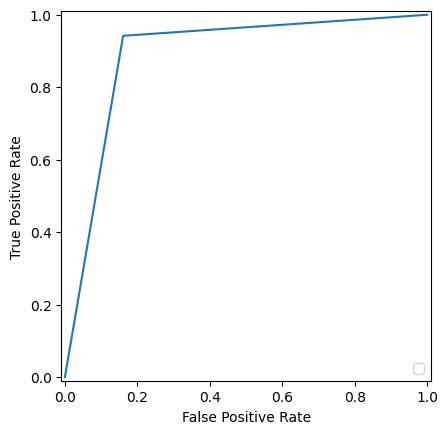

In [38]:
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_ohe_for_validation, LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation),pos_label=SGDClassifier_ohe_best_model.classes_[1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

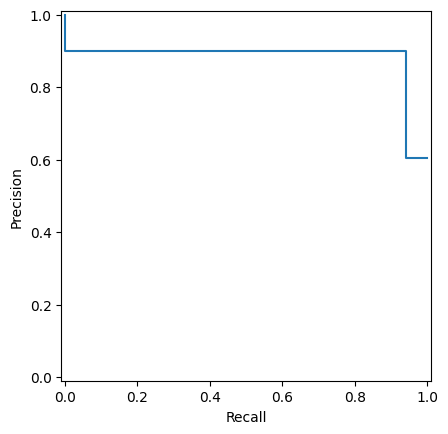

In [39]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_ohe_for_validation, LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation),pos_label=  SGDClassifier_ohe_best_model.classes_[1])
PrecisionRecallDisplay(precision=prec, recall=recall).plot()


In [40]:
best_models_task3

penalty         C  \
Best LogisticRegression with l1 all features                l1  0.088587   
Best LogisticRegression with l2 all features                l2  1.623777   
Best LogisticRegression with elasticnet all fea...  elasticnet  0.088587   
Best LogisticRegression without penalties all f...        None    0.0001   
Best SGDClassifier without penalties all features           l1      None   

                                                    max_iter solver  l1_ratio  \
Best LogisticRegression with l1 all features             100   saga      None   
Best LogisticRegression with l2 all features             100  lbfgs      None   
Best LogisticRegression with elasticnet all fea...       100   saga       1.0   
Best LogisticRegression without penalties all f...       100    sag      None   
Best SGDClassifier without penalties all features       2500   None  0.555556   

                                                   alpha learning_rate  \
Best LogisticRegression with l1 all features        None          None   
Best LogisticRegression with l2 all features        None          None   
Best LogisticRegression with elasticnet all fea...  None          None   
Best LogisticRegression without penalties all f...  None          None   
Best SGDClassifier without penalties all features   0.01      constant   

                                                    Accuracy  
Best LogisticRegression with l1 all features        0.901408  
Best LogisticRegression with l2 all features        0.859155  
Best LogisticRegression with elasticnet all fea...  0.901408  
Best LogisticRegression without penalties all f...  0.866197  
Best SGDClassifier without penalties all features   0.838028

# Висновок Завдання 3
Аж 2 моделі дали одинаковий Accrace який більший за решту моделей, а одже одна з них і буде оптимальною для розвязку завдання 3.
Я оберу для відповіді модель Best LogisticRegression with l1 all features	

In [41]:

Models = pd.DataFrame(data = {'Model_Name': ['Best LogisticRegression with l1 num features','Best LogisticRegression with l2 num features','Best LogisticRegression with elasticnet num features','Best LogisticRegression without penalties num features','Best LogisticRegression with l1 all features','Best LogisticRegression with l2 all features','Best LogisticRegression with elasticnet all features','Best LogisticRegression without penalties all features','Best SGDClassifier without penalties all features'],'Model':[LogisticRegression_l1_best_model,LogisticRegression_l2_best_model,LogisticRegression_elasticnet_best_model,LogisticRegression_best_model,LogisticRegression_l1_ohe_best_model,LogisticRegression_l2_ohe_best_model,LogisticRegression_elasticnet_ohe_best_model,LogisticRegression_ohe_best_model,SGDClassifier_ohe_best_model],'Accuracy':[accuracy_score(y_num_for_validation,LogisticRegression_l1_best_model.predict(X_num_for_validation)),accuracy_score(y_num_for_validation,LogisticRegression_l2_best_model.predict(X_num_for_validation)),accuracy_score(y_num_for_validation,LogisticRegression_elasticnet_best_model.predict(X_num_for_validation)),accuracy_score(y_num_for_validation,LogisticRegression_best_model.predict(X_num_for_validation)),accuracy_score(y_ohe_for_validation,LogisticRegression_l1_ohe_best_model.predict(X_ohe_for_validation)),accuracy_score(y_ohe_for_validation,LogisticRegression_l2_ohe_best_model.predict(X_ohe_for_validation)),accuracy_score(y_ohe_for_validation,LogisticRegression_elasticnet_ohe_best_model.predict(X_ohe_for_validation)),accuracy_score(y_ohe_for_validation,LogisticRegression_ohe_best_model.predict(X_ohe_for_validation)),accuracy_score(y_ohe_for_validation,SGDClassifier_ohe_best_model.predict(X_ohe_for_validation))]})


# Оптимальна модель для розвязку задачі
optimal_model = Models[Models['Accuracy'] == Models['Accuracy'].values.max()]['Model'].values[0]


Models



Model_Name  \
0       Best LogisticRegression with l1 num features   
1       Best LogisticRegression with l2 num features   
2  Best LogisticRegression with elasticnet num fe...   
3  Best LogisticRegression without penalties num ...   
4       Best LogisticRegression with l1 all features   
5       Best LogisticRegression with l2 all features   
6  Best LogisticRegression with elasticnet all fe...   
7  Best LogisticRegression without penalties all ...   
8  Best SGDClassifier without penalties all features   

                                               Model  Accuracy  
0  LogisticRegression(C=0.615848211066026, penalt...  0.880282  
1  LogisticRegression(C=11.288378916846883, solve...  0.883803  
2  LogisticRegression(C=0.23357214690901212, l1_r...  0.855634  
3         LogisticRegression(C=0.0001, penalty=None)  0.880282  
4  LogisticRegression(C=0.08858667904100823, pena...  0.901408  
5            LogisticRegression(C=1.623776739188721)  0.859155  
6  LogisticRegression(C=0.08858667904100823, l1_r...  0.901408  
7  LogisticRegression(C=0.0001, penalty=None, sol...  0.866197  
8  SGDClassifier(alpha=0.01, eta0=1, l1_ratio=0.5...  0.838028

In [70]:
# Імпортуємо DataFrame для зовнішнього оцінювання
test = pd.read_csv('predict.csv')


# Функція яка приведе зовнішній датасет до вигляду, який приймає рішаюча модель
def transform_test_data(model,test):
    
    
    if model in best_models_task3:
        test = pd.DataFrame(QuantileTransformer().fit_transform(test[X_num.columns]),columns=[X_num.columns])
        prediction =  np.array(model.predict(test)).astype(np.bool_)
        return [prediction,optimal_model.predict_proba(test)]
    
    
    else:
        test = columns_ohe.fit_transform(test)
        test = pd.DataFrame(QuantileTransformer().fit_transform(test),columns=test.columns)
        prediction = np.array(model.predict(test)).astype(np.bool_)
        return [prediction,optimal_model.predict_proba(test)]





In [71]:
# Зберегти прогнози у змінну best_clf_model_predictions та ймовірності у best_clf_model_predict_proba
data  = transform_test_data(optimal_model,test)
best_clf_model_predictions = data[0]
best_clf_model_predict_proba = data[1]

for t in zip(best_clf_model_predictions, best_clf_model_predict_proba[:,1]):
    print(*t)

False 0.11806050036064049
False 0.31185510701806785
False 0.42194315465943893
False 0.4834128056135752
False 0.16340029637115444
True 0.9805755799192948
True 0.8247106716248346
True 0.9147106268289565
True 0.9805755799192948
False 0.15648121864820613
True 0.6090318624974667
True 0.8247106716248346
True 0.8247106716248346
True 0.8247106716248346
True 0.6090318624974667
True 0.9567955196435041
True 0.9567955196435041
True 0.9147106268289565
True 0.9147106268289565
False 0.42194315465943893
True 0.9876665257668938
True 0.601068395821195
False 0.16340029637115444
True 0.6663389899065626
True 0.8247106716248346
True 0.9876665257668938
True 0.6663389899065626
True 0.9147106268289565
True 0.9147106268289565
False 0.4834128056135752
True 0.6663389899065626
True 0.9147106268289565
False 0.42194315465943893
False 0.31185510701806785
True 0.9147106268289565
True 0.9567955196435041
True 0.601068395821195
True 0.8247106716248346
True 0.9714215160837498
False 0.42194315465943893
True 0.9567955196435

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [72]:
# Запустити для створення файлу
pd.DataFrame(zip(best_clf_model_predictions, 
                 best_clf_model_predict_proba[:,1]), 
             columns=['preds', 'probas']).to_csv('predictions_clf.csv')